## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
"""
建立實驗組合（這個我抄解答的，真心不會～）
"""
Dropout_EXP = [0.1, 0.2, 0.4]
LAYER_NEURONS = [[128, 128, 128], [128, 256, 256], [128, 256, 512]]

In [16]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for i, (layer_neurons, drp_rate) in enumerate(itertools.product(LAYER_NEURONS, Dropout_EXP)):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Numbers of exp: %i, layer: %s, dropout_rate: %.2f" % (i, layer_neurons, drp_rate))
    model = build_mlp(input_shape=x_train.shape[1:], num_neurons=layer_neurons, drp_ratio=drp_rate)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-accuracy': train_acc,
                             'valid-accuracy': valid_acc}

Numbers of exp: 0, layer: [128, 128, 128], dropout_rate: 0.10
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               16512     
_______________________________________________________________

50000/50000 [==============================] - 4s 76us/step - loss: 1.4183 - accuracy: 0.4917 - val_loss: 1.4468 - val_accuracy: 0.4867
Epoch 47/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.4155 - accuracy: 0.4960 - val_loss: 1.4382 - val_accuracy: 0.4829
Epoch 48/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.4152 - accuracy: 0.4919 - val_loss: 1.4185 - val_accuracy: 0.4925
Epoch 49/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.4155 - accuracy: 0.4915 - val_loss: 1.4317 - val_accuracy: 0.4875
Epoch 50/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.4092 - accuracy: 0.4925 - val_loss: 1.4100 - val_accuracy: 0.4980
Numbers of exp: 1, layer: [128, 128, 128], dropout_rate: 0.20
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0     

50000/50000 [==============================] - 4s 72us/step - loss: 1.5845 - accuracy: 0.4280 - val_loss: 1.5358 - val_accuracy: 0.4562
Epoch 42/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.5871 - accuracy: 0.4271 - val_loss: 1.5243 - val_accuracy: 0.4536
Epoch 43/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.5750 - accuracy: 0.4303 - val_loss: 1.5172 - val_accuracy: 0.4574
Epoch 44/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.5790 - accuracy: 0.4305 - val_loss: 1.4990 - val_accuracy: 0.4619
Epoch 45/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.5786 - accuracy: 0.4307 - val_loss: 1.5350 - val_accuracy: 0.4588
Epoch 46/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.5759 - accuracy: 0.4336 - val_loss: 1.5147 - val_accuracy: 0.4554
Epoch 47/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.5821 - accuracy: 0.4299 - val_loss: 1.5330

50000/50000 [==============================] - 4s 75us/step - loss: 1.9766 - accuracy: 0.2518 - val_loss: 1.9817 - val_accuracy: 0.2766
Epoch 37/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.9796 - accuracy: 0.2489 - val_loss: 2.0028 - val_accuracy: 0.2485
Epoch 38/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.9767 - accuracy: 0.2526 - val_loss: 1.9929 - val_accuracy: 0.2712
Epoch 39/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.9793 - accuracy: 0.2499 - val_loss: 2.0281 - val_accuracy: 0.2668
Epoch 40/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.9758 - accuracy: 0.2543 - val_loss: 2.0348 - val_accuracy: 0.2545
Epoch 41/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.9790 - accuracy: 0.2526 - val_loss: 2.0231 - val_accuracy: 0.2668
Epoch 42/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.9750 - accuracy: 0.2531 - val_loss: 2.0192

50000/50000 [==============================] - 4s 81us/step - loss: 1.4092 - accuracy: 0.4933 - val_loss: 1.4069 - val_accuracy: 0.4992
Epoch 32/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.3998 - accuracy: 0.4951 - val_loss: 1.4230 - val_accuracy: 0.4964
Epoch 33/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.3952 - accuracy: 0.4996 - val_loss: 1.4380 - val_accuracy: 0.4849
Epoch 34/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.3948 - accuracy: 0.4957 - val_loss: 1.4167 - val_accuracy: 0.4919
Epoch 35/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.3931 - accuracy: 0.5023 - val_loss: 1.4027 - val_accuracy: 0.5026
Epoch 36/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.3828 - accuracy: 0.5023 - val_loss: 1.4130 - val_accuracy: 0.4975
Epoch 37/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.3866 - accuracy: 0.5013 - val_loss: 1.4097

50000/50000 [==============================] - 4s 79us/step - loss: 1.5786 - accuracy: 0.4286 - val_loss: 1.5252 - val_accuracy: 0.4575
Epoch 27/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.5711 - accuracy: 0.4330 - val_loss: 1.5474 - val_accuracy: 0.4498
Epoch 28/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.5741 - accuracy: 0.4307 - val_loss: 1.5308 - val_accuracy: 0.4588
Epoch 29/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.5668 - accuracy: 0.4351 - val_loss: 1.4967 - val_accuracy: 0.4616
Epoch 30/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.5705 - accuracy: 0.4319 - val_loss: 1.5458 - val_accuracy: 0.4415
Epoch 31/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.5709 - accuracy: 0.4334 - val_loss: 1.5262 - val_accuracy: 0.4574
Epoch 32/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.5505 - accuracy: 0.4394 - val_loss: 1.5306

50000/50000 [==============================] - 4s 79us/step - loss: 2.0178 - accuracy: 0.2273 - val_loss: 2.0285 - val_accuracy: 0.2209
Epoch 22/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.0185 - accuracy: 0.2265 - val_loss: 2.0254 - val_accuracy: 0.2309
Epoch 23/50
50000/50000 [==============================] - 4s 79us/step - loss: 2.0164 - accuracy: 0.2259 - val_loss: 2.0741 - val_accuracy: 0.2133
Epoch 24/50
50000/50000 [==============================] - 4s 79us/step - loss: 2.0180 - accuracy: 0.2247 - val_loss: 2.0069 - val_accuracy: 0.2428
Epoch 25/50
50000/50000 [==============================] - 4s 79us/step - loss: 2.0143 - accuracy: 0.2273 - val_loss: 2.0941 - val_accuracy: 0.1990
Epoch 26/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.0155 - accuracy: 0.2298 - val_loss: 2.1173 - val_accuracy: 0.2241
Epoch 27/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.0144 - accuracy: 0.2282 - val_loss: 2.0951

50000/50000 [==============================] - 4s 88us/step - loss: 1.4502 - accuracy: 0.4793 - val_loss: 1.4618 - val_accuracy: 0.4799
Epoch 17/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.4389 - accuracy: 0.4809 - val_loss: 1.4078 - val_accuracy: 0.5009
Epoch 18/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.4337 - accuracy: 0.4840 - val_loss: 1.4308 - val_accuracy: 0.4853
Epoch 19/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.4246 - accuracy: 0.4864 - val_loss: 1.4116 - val_accuracy: 0.5016
Epoch 20/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.4160 - accuracy: 0.4904 - val_loss: 1.4131 - val_accuracy: 0.4954
Epoch 21/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.4009 - accuracy: 0.4959 - val_loss: 1.4041 - val_accuracy: 0.5025
Epoch 22/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.3968 - accuracy: 0.4996 - val_loss: 1.3913

50000/50000 [==============================] - 4s 89us/step - loss: 1.7091 - accuracy: 0.3794 - val_loss: 1.6723 - val_accuracy: 0.4078
Epoch 12/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.6992 - accuracy: 0.3867 - val_loss: 1.6257 - val_accuracy: 0.4221
Epoch 13/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.6919 - accuracy: 0.3878 - val_loss: 1.6188 - val_accuracy: 0.4285
Epoch 14/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.6832 - accuracy: 0.3919 - val_loss: 1.6216 - val_accuracy: 0.4154
Epoch 15/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.6783 - accuracy: 0.3939 - val_loss: 1.6306 - val_accuracy: 0.4209
Epoch 16/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.6750 - accuracy: 0.3926 - val_loss: 1.6062 - val_accuracy: 0.4324
Epoch 17/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.6773 - accuracy: 0.3943 - val_loss: 1.6022

50000/50000 [==============================] - 5s 90us/step - loss: 1.9859 - accuracy: 0.2428 - val_loss: 1.9433 - val_accuracy: 0.2815
Epoch 7/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.9746 - accuracy: 0.2470 - val_loss: 1.9583 - val_accuracy: 0.2672
Epoch 8/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.9749 - accuracy: 0.2488 - val_loss: 1.9342 - val_accuracy: 0.2906
Epoch 9/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.9706 - accuracy: 0.2495 - val_loss: 1.9513 - val_accuracy: 0.2760
Epoch 10/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.9646 - accuracy: 0.2507 - val_loss: 1.9706 - val_accuracy: 0.2845
Epoch 11/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.9550 - accuracy: 0.2551 - val_loss: 1.9473 - val_accuracy: 0.2868
Epoch 12/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.9553 - accuracy: 0.2569 - val_loss: 1.9531 - 

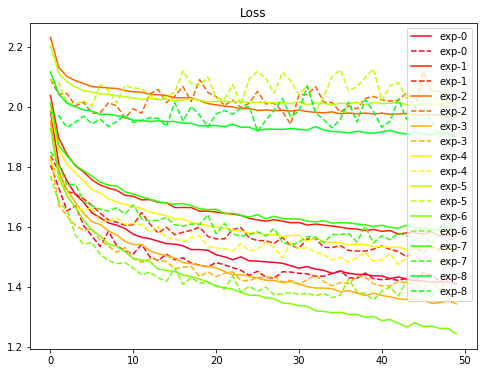

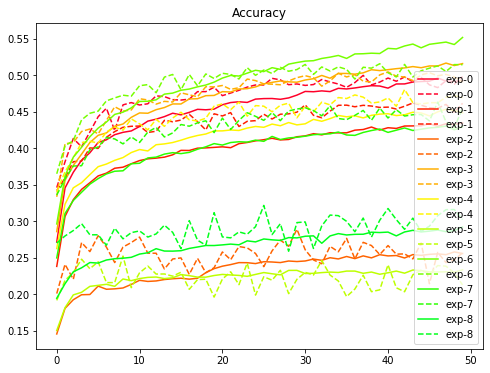

In [18]:
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()